# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

This notebook provides an overview of Dandiset 001361, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data is part of the study "A flexible hippocampal population code for experience relative to reward".

You can find the Dandiset here: https://dandiarchive.org/dandiset/001361

This notebook will cover the following:
1.  Loading the Dandiset metadata.
2.  Listing the assets in the Dandiset.
3.  Loading and visualizing behavioral data (position, speed, lick).
4.  Loading and visualizing the mean image from the 2-photon imaging data.

### Required Packages
The following packages are required to run this notebook:
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

Found 152 assets in the dataset

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb


### Loading an NWB file and extracting behavioral data

We will load the first NWB file in the Dandiset: `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.
We will also show how to get the URL of the asset.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data


Now let's extract and plot the position data.

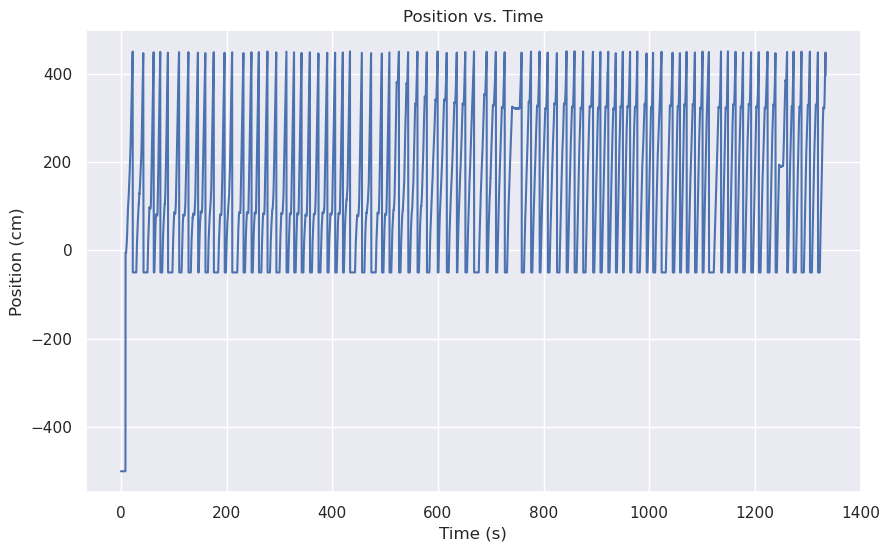

In [3]:
# Extract position and timestamps
position_data = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"].data[:]
position_timestamps = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"].timestamps[:]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(position_timestamps, position_data)
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Position vs. Time")
plt.show()

Next, let's extract and plot the speed data.

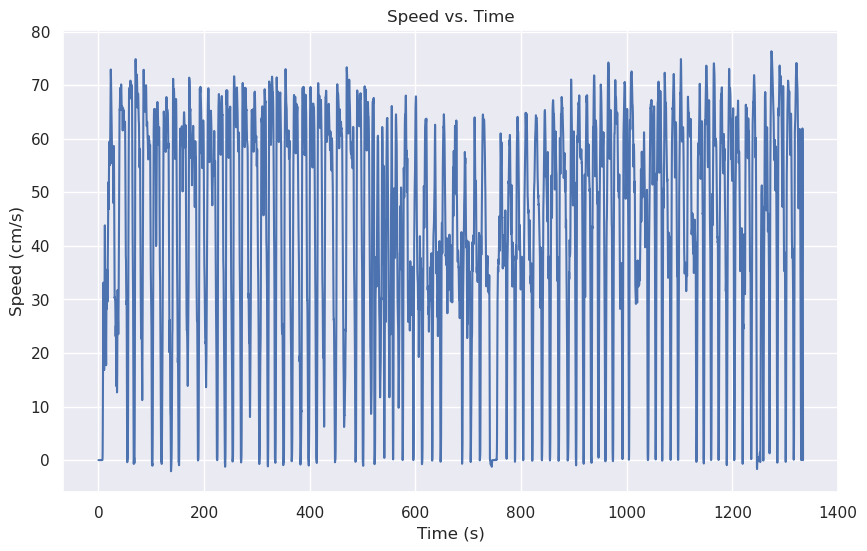

In [4]:
# Extract speed and timestamps
speed_data = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["speed"].data[:]
speed_timestamps = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["speed"].timestamps[:]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(speed_timestamps, speed_data)
plt.xlabel("Time (s)")
plt.ylabel("Speed (cm/s)")
plt.title("Speed vs. Time")
plt.show()

Now, let's extract and plot the lick data.

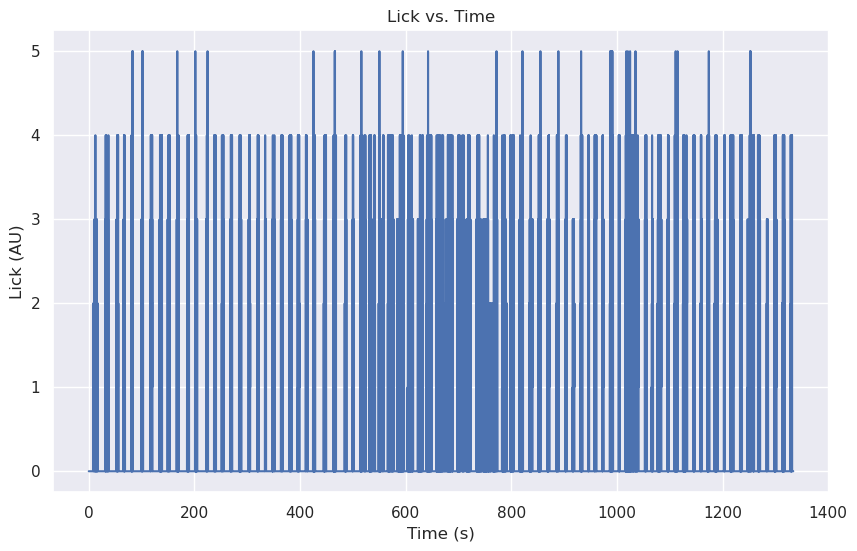

In [5]:
# Extract lick and timestamps
lick_data = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["lick"].data[:]
lick_timestamps = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["lick"].timestamps[:]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lick_timestamps, lick_data)
plt.xlabel("Time (s)")
plt.ylabel("Lick (AU)")
plt.title("Lick vs. Time")
plt.show()

### Loading and visualizing the mean image

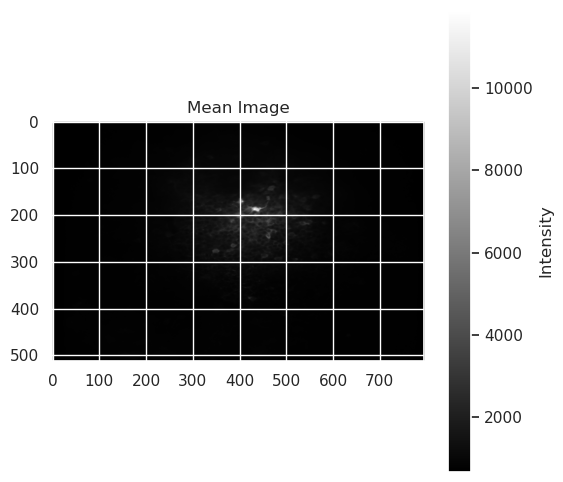

In [6]:
# Extract mean image
mean_image = nwb.processing["ophys"].data_interfaces["Backgrounds_0"].images["meanImg"].data[:]

# Create the plot
plt.figure(figsize=(6, 6))
plt.imshow(mean_image, cmap="gray")
plt.colorbar(label="Intensity")
plt.title("Mean Image")
plt.show()

### Summary
This notebook demonstrated how to load and visualize data from Dandiset 001361. We loaded behavioral data (position, speed, lick) and the mean image from the 2-photon imaging data.

### Possible Future Directions
*   Explore other NWB files in the Dandiset.
*   Analyze the relationships between behavioral and imaging data.
*   Perform more advanced image processing and analysis.